# Tabu

In [102]:
import pandas as pd
import glob

# Caminho dos arquivos .txt
caminho_arquivos = 'results_tabu_v2/results/*.txt'  # ajuste conforme necessário
arquivos = glob.glob(caminho_arquivos)

columns_tabu = ['conflitos', 'tempo_us', 'iter_found_best', 
           'max_iter', 'T_iter', 'num_color', 'filename', 
           'num_vertices', 'num_edges', 'init_method' ]

# Lista para armazenar os DataFrames
df_list_tabu = []

# Lê todos os arquivos e empilha em um único DataFrame
for arquivo in arquivos:
    df = pd.read_csv(arquivo, sep=';', engine='python', names=columns_tabu, header=None)
    df_list_tabu.append(df)

# Combina todos os DataFrames em um só
df_total_tabu = pd.concat(df_list_tabu, ignore_index=True)
# Converte tempo de microssegundos para segundos
df_total_tabu['tempo_s'] = df_total_tabu['tempo_us'] / 1_000_000

# Função para extrair estatísticas por filename
def agrupar_e_agregar(grupo):
    linha_min_conf = grupo.loc[grupo['conflitos'].idxmin()]
    return pd.Series({
        'min_conflitos': grupo['conflitos'].min(),
        'avg_conflitos': grupo['conflitos'].mean(),
        'std_conflitos': grupo['conflitos'].std(),
        'iter_found_best_min_conf': linha_min_conf['iter_found_best'],
        'avg_iter_found_best': grupo['iter_found_best'].mean(),
        'min_tempo_s': grupo['tempo_s'].min(),
        'avg_tempo_s': grupo['tempo_s'].mean(),
        'filename': linha_min_conf['filename'],
        'init_method': linha_min_conf['init_method']
    })

# Aplica a agregação
resultado_tabu = df_total_tabu.groupby(['filename', 'init_method']).apply(agrupar_e_agregar).reset_index(drop=True)

resultado_tabu['filename'] = resultado_tabu['filename'].str.replace('instances/', '', regex=False).str.replace('.col', '', regex=False)

# Mostra o resultado
resultado_tabu.head()

/tmp/ipykernel_2520/1861739574.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultado_tabu = df_total_tabu.groupby(['filename', 'init_method']).apply(agrupar_e_agregar).reset_index(drop=True)


,min_conflitos,avg_conflitos,std_conflitos,iter_found_best_min_conf,avg_iter_found_best,min_tempo_s,avg_tempo_s,filename,init_method
0,1,1.00,0.000000,0,0.00,0.098965,0.104429,1-Insertions_4,greedy
1,1,1.22,0.628932,26,29.92,0.080736,0.095331,1-Insertions_4,random
2,0,0.00,0.000000,0,0.00,0.000435,0.000456,1-Insertions_6,greedy
3,0,1.10,1.176367,303,309.22,0.505424,1.407888,1-Insertions_6,random
4,0,0.00,0.000000,0,0.00,0.000020,0.000024,2-Insertions_3,greedy


In [103]:
df_total_tabu.tail()

,conflitos,tempo_us,iter_found_best,max_iter,T_iter,num_color,filename,num_vertices,num_edges,init_method,tempo_s
8578,12,221916,2,10000,25,5,instances/queen5_5.col,25,320,greedy,0.221916
8579,12,226630,2,10000,25,5,instances/queen5_5.col,25,320,greedy,0.226630
8580,12,212401,2,10000,25,5,instances/queen5_5.col,25,320,greedy,0.212401
8581,12,215493,2,10000,25,5,instances/queen5_5.col,25,320,greedy,0.215493
8582,12,239092,2,10000,25,5,instances/queen5_5.col,25,320,greedy,0.239092


# Greedy

In [104]:
import pandas as pd
import glob

# Caminho dos arquivos .txt
caminho_arquivos_greedy = 'results_greedy/*.txt'  # ajuste conforme necessário
arquivos_greedy = glob.glob(caminho_arquivos_greedy)

columns_greedy = ['conflitos', 'tempo_us', 'filename', 'num_vertex', 'num_edges' ]

# Lista para armazenar os DataFrames
df_list_greedy = []

# Lê todos os arquivos e empilha em um único DataFrame
for arquivo in arquivos_greedy:
    df = pd.read_csv(arquivo, sep=';', engine='python', names=columns_greedy, header=None)
    df_list_greedy.append(df)

# Combina todos os DataFrames em um só
df_total_greedy = pd.concat(df_list_greedy, ignore_index=True)

df_total_greedy.head()
# Converte tempo de microssegundos para segundos
df_total_greedy['tempo_s'] = df_total_greedy['tempo_us'] / 1_000

# Função para extrair estatísticas por filename
def agrupar_e_agregar(grupo):
    linha_min_conf = grupo.loc[grupo['conflitos'].idxmin()]
    return pd.Series({
        'conflitos': grupo['conflitos'].min(),
        'tempo_s': grupo['tempo_s'].min(),
        'filename': linha_min_conf['filename']
    })

# Aplica a agregação
resultado_greedy = df_total_greedy.groupby('filename').apply(agrupar_e_agregar).reset_index(drop=True)

resultado_greedy['filename'] = resultado_greedy['filename'].str.replace('instances/', '', regex=False).str.replace('.col', '', regex=False)

# Mostra o resultado
# print(resultado)

resultado_greedy.head()




/tmp/ipykernel_2520/3546823030.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultado_greedy = df_total_greedy.groupby('filename').apply(agrupar_e_agregar).reset_index(drop=True)


,conflitos,tempo_s,filename
0,1,0.026,1-Insertions_4
1,0,0.318,1-Insertions_6
2,0,0.012,2-Insertions_3
3,1,0.049,2-Insertions_4
4,0,0.254,2-Insertions_5


# SA

In [105]:
import glob
import pandas as pd

# Caminho dos arquivos .txt
caminho_arquivos_sa = 'results_sa_v2/results/*.txt'  # ajuste conforme necessário
arquivos_sa = glob.glob(caminho_arquivos_sa)

# Nomes das colunas esperadas nos arquivos
columns_sa = [
    'conflitos', 'tempo_us', 'T_max', 
    'T_min', 'max_iter', 'max_worsen', 
    'alpha', 'num_color', 'iter_found_best', 
    'curr_Temp', 'filename', 'num_vertices',
    'num_edges', 'init_method'
]

# Lê todos os arquivos e empilha em um único DataFrame
df_list_sa = [pd.read_csv(arquivo, sep=';', engine='python', names=columns_sa, header=None) for arquivo in arquivos_sa]
df_total_sa = pd.concat(df_list_sa, ignore_index=True)

# Converte tempo de microssegundos para segundos
df_total_sa['tempo_s'] = df_total_sa['tempo_us'] / 1_000

# Filtra apenas os casos com init_method 'greedy' ou 'random' com max_worsen == 5000
df_total_sa_g = df_total_sa[
    (df_total_sa["init_method"] == "greedy") |
    ((df_total_sa["init_method"] == "random") & (df_total_sa["max_worsen"] == 5000))
]

# Função para extrair estatísticas por grupo
def agrupar_e_agregar(grupo):
    linha_min_conf = grupo.loc[grupo['conflitos'].idxmin()]
    return pd.Series({
        'init_method': linha_min_conf['init_method'],
        'filename': linha_min_conf['filename'],
        'min_conflitos': grupo['conflitos'].min(),
        'avg_conflitos': grupo['conflitos'].mean(),
        'std_conflitos': grupo['conflitos'].std(),
        'iter_found_best_min_conf': linha_min_conf['iter_found_best'],
        'avg_iter_found_best': grupo['iter_found_best'].mean(),
        'min_tempo_s': grupo['tempo_s'].min(),
        'avg_tempo_s': grupo['tempo_s'].mean()
    })

# Aplica a agregação por filename e init_method
resultado_sa = df_total_sa_g.groupby(['filename', 'init_method']).apply(agrupar_e_agregar).reset_index(drop=True)

# Remove prefixo e sufixo dos nomes de arquivos
resultado_sa['filename'] = resultado_sa['filename'].str.replace('instances/', '', regex=False).str.replace('.col', '', regex=False)

# Exibe os resultados
resultado_sa.head()


/tmp/ipykernel_2520/1714932747.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultado_sa = df_total_sa_g.groupby(['filename', 'init_method']).apply(agrupar_e_agregar).reset_index(drop=True)


,init_method,filename,min_conflitos,avg_conflitos,std_conflitos,iter_found_best_min_conf,avg_iter_found_best,min_tempo_s,avg_tempo_s
0,greedy,1-Insertions_4,0,0.960000,0.196946,3,0.030000,0.044,142.824900
1,random,1-Insertions_4,16,20.166667,1.821014,132870,112173.466667,608.108,646.590567
2,greedy,1-Insertions_6,0,0.000000,0.000000,0,0.000000,0.484,0.913240
3,random,1-Insertions_6,628,653.633333,12.658603,141844,146247.400000,13243.622,14277.511067
4,greedy,2-Insertions_3,0,0.000000,0.000000,0,0.000000,0.025,0.063800


# Analysis

In [106]:
resultado_sa.count()

init_method                 158
filename                    158
min_conflitos               158
avg_conflitos               158
std_conflitos               158
iter_found_best_min_conf    158
avg_iter_found_best         158
min_tempo_s                 158
avg_tempo_s                 158
dtype: int64

In [107]:
resultado_greedy.count()

conflitos    79
tempo_s      79
filename     79
dtype: int64

In [108]:
resultado_tabu.count()

min_conflitos               157
avg_conflitos               157
std_conflitos               157
iter_found_best_min_conf    157
avg_iter_found_best         157
min_tempo_s                 157
avg_tempo_s                 157
filename                    157
init_method                 157
dtype: int64

In [109]:
print(len(resultado_tabu['filename'].unique()))
print(len(resultado_sa['filename'].unique()))

79
79


In [110]:
print(len(resultado_tabu[['filename', 'init_method']].drop_duplicates()))
print(len(resultado_sa[['filename', 'init_method']].drop_duplicates()))

157
158


## Importando Df com descrição das instâncias

In [111]:
df_desc = pd.read_csv('instances_with_k.csv', sep=';', header=0)
df_desc.head()

,instance_name,V,E,D,xk,k,group
0,DSJC250.1,250,3218,NaN,(?/8),8,DSJ
1,DSJC250.5,250,15668,NaN,(?/28),28,DSJ
2,DSJC500.1,500,12458,NaN,(?/12),12,DSJ
3,DSJC500.5,500,62624,NaN,(?/48),48,DSJ
4,DSJR500.1,500,3555,NaN,(12/12),12,DSJ


## Comparativo entre os métodos

### Somente com conflitos > zero no Greedy Method

In [112]:
# Filtra os FileNames com conflitos diferentes de zero no Greedy
filenames_com_conflito = resultado_greedy[resultado_greedy['conflitos'] != 0]['filename'].unique()

filenames_com_conflito

array(['1-Insertions_4', '2-Insertions_4', '3-FullIns_4', '4-FullIns_4',
       '4-Insertions_3', 'DSJC1000.1', 'DSJC250.1', 'DSJC250.5',
       'DSJC500.1', 'DSJC500.5', 'DSJR500.1', 'DSJR500.1c', 'DSJR500.5',
       'anna', 'ash331GPIA', 'ash608GPIA', 'david', 'homer', 'le450_15a',
       'le450_15b', 'le450_15c', 'le450_15d', 'le450_25a', 'le450_25b',
       'le450_25c', 'le450_25d', 'le450_5a', 'le450_5b', 'le450_5c',
       'le450_5d', 'miles1000', 'miles1500', 'miles250', 'miles500',
       'miles750', 'qg.order100', 'qg.order30', 'qg.order40',
       'qg.order60', 'queen11_11', 'queen13_13', 'queen5_5', 'queen6_6',
       'queen7_7', 'queen8_12', 'queen8_8', 'queen9_9', 'will199GPIA'],
      dtype=object)

In [113]:
# Filtra os três DataFrames com base nesses filenames
greedy_filtrado = resultado_greedy[resultado_greedy['filename'].isin(filenames_com_conflito)]
tabu_filtrado = resultado_tabu[resultado_tabu['filename'].isin(filenames_com_conflito)]
sa_filtrado = resultado_sa[resultado_sa['filename'].isin(filenames_com_conflito)]

tabu_filtrado.tail()

,min_conflitos,avg_conflitos,std_conflitos,iter_found_best_min_conf,avg_iter_found_best,min_tempo_s,avg_tempo_s,filename,init_method
146,4,12.26,4.016682,61,62.11,0.345086,0.776921,queen8_8,random
147,6,6.00,0.000000,59,59.00,0.665161,0.760117,queen9_9,greedy
148,6,16.10,5.221362,101,86.26,0.570486,1.258665,queen9_9,random
149,7,7.00,0.000000,65,65.00,1.503074,1.623242,will199GPIA,greedy
150,3,10.48,3.809822,570,582.40,2.524963,3.474434,will199GPIA,random


In [114]:
sa_filtrado.head()

,init_method,filename,min_conflitos,avg_conflitos,std_conflitos,iter_found_best_min_conf,avg_iter_found_best,min_tempo_s,avg_tempo_s
0,greedy,1-Insertions_4,0,0.960000,0.196946,3,0.030000,0.044,142.824900
1,random,1-Insertions_4,16,20.166667,1.821014,132870,112173.466667,608.108,646.590567
6,greedy,2-Insertions_4,0,0.970000,0.171447,4,0.110000,0.091,293.953000
7,random,2-Insertions_4,63,67.166667,1.984132,22285,97797.933333,1363.790,1551.364367
10,greedy,3-FullIns_4,56,57.940000,0.312048,1,0.020000,1429.161,1592.960480


#### Melhores resultados encontrados

In [115]:
# Greedy
greedy_comp = greedy_filtrado[['filename', 'conflitos', 'tempo_s']].rename(
    columns={'conflitos': 'conflitos_Greedy', 'tempo_s': 'tempo_s_Greedy'})

# Tabu rand
tabu_rand = tabu_filtrado[tabu_filtrado['init_method'] == 'random'][['filename', 'min_conflitos', 'min_tempo_s']].rename(
    columns={'min_conflitos': 'conflitos_Tabu_rand', 'min_tempo_s': 'tempo_s_Tabu_rand'})

# Tabu gree
tabu_gree = tabu_filtrado[tabu_filtrado['init_method'] == 'greedy'][['filename', 'min_conflitos', 'min_tempo_s']].rename(
    columns={'min_conflitos': 'conflitos_Tabu_gree', 'min_tempo_s': 'tempo_s_Tabu_gree'})

# SA rand
sa_rand = sa_filtrado[sa_filtrado['init_method'] == 'random'][['filename', 'min_conflitos', 'min_tempo_s']].rename(
    columns={'min_conflitos': 'conflitos_SA_rand', 'min_tempo_s': 'tempo_s_SA_rand'})

# SA gree
sa_gree = sa_filtrado[sa_filtrado['init_method'] == 'greedy'][['filename', 'min_conflitos', 'min_tempo_s']].rename(
    columns={'min_conflitos': 'conflitos_SA_gree', 'min_tempo_s': 'tempo_SA_gree'})

# Junta tudo com merge por filename
comparativo = greedy_comp.merge(tabu_rand, on='filename', how='left') \
                         .merge(tabu_gree, on='filename', how='left') \
                         .merge(sa_rand, on='filename', how='left') \
                         .merge(sa_gree, on='filename', how='left')

comparativo.head()

,filename,conflitos_Greedy,tempo_s_Greedy,conflitos_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,tempo_SA_gree
0,1-Insertions_4,1,0.026,1.0,0.080736,1,0.098965,16,608.108,0,0.044
1,2-Insertions_4,1,0.049,1.0,0.172162,1,0.192954,63,1363.790,0,0.091
2,3-FullIns_4,58,0.285,0.0,0.178862,11,1.433548,324,7378.807,56,1429.161
3,4-FullIns_4,80,0.486,0.0,0.730643,11,2.123744,576,13383.807,78,2585.933
4,4-Insertions_3,1,0.024,1.0,0.080294,1,0.091979,14,434.794,0,0.043


In [116]:
# Primeiro, se necessário, renomeia a coluna 'filename' para 'instance_name' no df_comp
df_comp = comparativo.rename(columns={'filename': 'instance_name'})

# Agora faz o merge/join com base na coluna 'instance_name'
comparativo = pd.merge(df_comp, df_desc[['instance_name', 'V', 'E', 'k', 'group']], on='instance_name', how='left')

comparativo.head()

,instance_name,conflitos_Greedy,tempo_s_Greedy,conflitos_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,tempo_SA_gree,V,E,k,group
0,1-Insertions_4,1,0.026,1.0,0.080736,1,0.098965,16,608.108,0,0.044,67,232,4,CAR
1,2-Insertions_4,1,0.049,1.0,0.172162,1,0.192954,63,1363.790,0,0.091,149,541,4,CAR
2,3-FullIns_4,58,0.285,0.0,0.178862,11,1.433548,324,7378.807,56,1429.161,405,3524,7,CAR
3,4-FullIns_4,80,0.486,0.0,0.730643,11,2.123744,576,13383.807,78,2585.933,690,6650,8,CAR
4,4-Insertions_3,1,0.024,1.0,0.080294,1,0.091979,14,434.794,0,0.043,79,156,3,CAR


In [117]:
comparativo['V_E'] = '(' + comparativo['V'].astype(str) + '/' + comparativo['E'].astype(str) + ')'

comparativo.head()

,instance_name,conflitos_Greedy,tempo_s_Greedy,conflitos_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,tempo_SA_gree,V,E,k,group,V_E
0,1-Insertions_4,1,0.026,1.0,0.080736,1,0.098965,16,608.108,0,0.044,67,232,4,CAR,(67/232)
1,2-Insertions_4,1,0.049,1.0,0.172162,1,0.192954,63,1363.790,0,0.091,149,541,4,CAR,(149/541)
2,3-FullIns_4,58,0.285,0.0,0.178862,11,1.433548,324,7378.807,56,1429.161,405,3524,7,CAR,(405/3524)
3,4-FullIns_4,80,0.486,0.0,0.730643,11,2.123744,576,13383.807,78,2585.933,690,6650,8,CAR,(690/6650)
4,4-Insertions_3,1,0.024,1.0,0.080294,1,0.091979,14,434.794,0,0.043,79,156,3,CAR,(79/156)


In [118]:
comparativo.loc[
    comparativo["conflitos_SA_gree"] < comparativo["conflitos_Greedy"],
    ["instance_name", "conflitos_Greedy", "tempo_s_Greedy", "conflitos_SA_gree", "tempo_SA_gree"]
].count()


instance_name        37
conflitos_Greedy     37
tempo_s_Greedy       37
conflitos_SA_gree    37
tempo_SA_gree        37
dtype: int64

In [119]:
comparativo.loc[
    comparativo["conflitos_Tabu_gree"] < comparativo["conflitos_Tabu_rand"],
    ["instance_name", "conflitos_Greedy", "tempo_s_Greedy", 
             "conflitos_Tabu_rand", "tempo_s_Tabu_rand", 
             "conflitos_Tabu_gree", "tempo_s_Tabu_gree"]
].head()

,instance_name,conflitos_Greedy,tempo_s_Greedy,conflitos_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,tempo_s_Tabu_gree
17,homer,8,0.253,114.0,0.033859,8,0.000592
36,qg.order30,88,1.920,5.0,17.306757,0,0.066601
38,qg.order60,352,19.953,38.0,1342.909423,0,4.076594


In [120]:
comparativo.count()

instance_name          48
conflitos_Greedy       48
tempo_s_Greedy         48
conflitos_Tabu_rand    47
tempo_s_Tabu_rand      47
conflitos_Tabu_gree    48
tempo_s_Tabu_gree      48
conflitos_SA_rand      48
tempo_s_SA_rand        48
conflitos_SA_gree      48
tempo_SA_gree          48
V                      48
E                      48
k                      48
group                  48
V_E                    48
dtype: int64

In [121]:
destacadas = ['group', 'instance_name', 'V_E', 'k']
resto = [col for col in comparativo.columns if col not in destacadas]
comparativo = comparativo[destacadas + resto]

In [122]:
comparativo = comparativo.sort_values(by=['group', 'instance_name']).reset_index(drop=True)

In [123]:
comparativo.to_csv("Tables/comparativo_min.csv", index=False, sep=';')

#### Média dos resultados

In [124]:
# Greedy
greedy_comp = greedy_filtrado[['filename', 'conflitos', 'tempo_s']].rename(
    columns={'conflitos': 'conflitos_Greedy', 'tempo_s': 'tempo_s_Greedy'})

# Tabu rand
tabu_rand_avg = tabu_filtrado[tabu_filtrado['init_method'] == 'random'][['filename', 'avg_conflitos', 'avg_iter_found_best', 'std_conflitos', 'avg_tempo_s']].rename(
    columns={'avg_conflitos': 'conflitos_Tabu_rand', 'avg_iter_found_best': 'avg_iter_Tabu_rand', 'std_conflitos': 'std_Tabu_rand', 'avg_tempo_s': 'tempo_s_Tabu_rand'})

# Tabu gree
tabu_gree_avg = tabu_filtrado[tabu_filtrado['init_method'] == 'greedy'][['filename', 'avg_conflitos', 'avg_iter_found_best', 'std_conflitos', 'avg_tempo_s']].rename(
    columns={'avg_conflitos': 'conflitos_Tabu_gree', 'avg_iter_found_best': 'avg_iter_Tabu_gree', 'std_conflitos': 'std_Tabu_gree', 'avg_tempo_s': 'tempo_s_Tabu_gree'})

# SA rand
sa_rand_avg = sa_filtrado[sa_filtrado['init_method'] == 'random'][['filename', 'avg_conflitos', 'avg_iter_found_best', 'std_conflitos', 'avg_tempo_s']].rename(
    columns={'avg_conflitos': 'conflitos_SA_rand', 'avg_iter_found_best': 'avg_iter_SA_rand', 'std_conflitos': 'std_SA_rand', 'avg_tempo_s': 'tempo_s_SA_rand'})

# SA gree
sa_gree_avg = sa_filtrado[sa_filtrado['init_method'] == 'greedy'][['filename', 'avg_conflitos', 'avg_iter_found_best', 'std_conflitos', 'avg_tempo_s']].rename(
    columns={'avg_conflitos': 'conflitos_SA_gree', 'avg_iter_found_best': 'avg_iter_SA_gree', 'std_conflitos': 'std_SA_gree', 'avg_tempo_s': 'tempo_SA_gree'})

# Junta tudo com merge por filename
comparativo_avg = tabu_rand_avg.merge(tabu_gree_avg, on='filename', how='left') \
                         .merge(sa_rand_avg, on='filename', how='left') \
                         .merge(sa_gree_avg, on='filename', how='left')

# Visualiza o resultado
comparativo_avg.head()

,filename,conflitos_Tabu_rand,avg_iter_Tabu_rand,std_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,avg_iter_Tabu_gree,std_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,avg_iter_SA_rand,std_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,avg_iter_SA_gree,std_SA_gree,tempo_SA_gree
0,1-Insertions_4,1.22,29.92,0.628932,0.095331,1.0,0.0,0.0,0.104429,20.166667,112173.466667,1.821014,646.590567,0.96,0.03,0.196946,142.82490
1,2-Insertions_4,2.17,74.17,1.407448,0.234366,1.0,0.0,0.0,0.198373,67.166667,97797.933333,1.984132,1551.364367,0.97,0.11,0.171447,293.95300
2,3-FullIns_4,2.62,191.83,1.143979,1.025252,11.0,89.0,0.0,1.485765,346.466667,131923.466667,8.524744,8006.436000,57.94,0.02,0.312048,1592.96048
3,4-FullIns_4,3.27,310.93,1.301553,2.334832,11.0,86.0,0.0,2.311864,605.066667,144787.233333,12.531157,14483.984900,79.93,0.10,0.325825,2865.16926
4,4-Insertions_3,2.59,44.06,1.980180,0.135261,1.0,0.0,0.0,0.095418,17.033333,73697.200000,1.401559,469.562500,0.98,0.01,0.140705,88.83820


In [125]:
# Primeiro, se necessário, renomeia a coluna 'filename' para 'instance_name' no df_comp
df_comp_avg = comparativo_avg.rename(columns={'filename': 'instance_name'})

# Agora faz o merge/join com base na coluna 'instance_name'
comparativo_avg = pd.merge(df_comp_avg, df_desc[['instance_name', 'V', 'E', 'k', 'group']], on='instance_name', how='left')
comparativo_avg['V_E'] = '(' + comparativo_avg['V'].astype(str) + '/' + comparativo_avg['E'].astype(str) + ')'

comparativo_avg.head()

,instance_name,conflitos_Tabu_rand,avg_iter_Tabu_rand,std_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,avg_iter_Tabu_gree,std_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,...,tempo_s_SA_rand,conflitos_SA_gree,avg_iter_SA_gree,std_SA_gree,tempo_SA_gree,V,E,k,group,V_E
0,1-Insertions_4,1.22,29.92,0.628932,0.095331,1.0,0.0,0.0,0.104429,20.166667,...,646.590567,0.96,0.03,0.196946,142.82490,67,232,4,CAR,(67/232)
1,2-Insertions_4,2.17,74.17,1.407448,0.234366,1.0,0.0,0.0,0.198373,67.166667,...,1551.364367,0.97,0.11,0.171447,293.95300,149,541,4,CAR,(149/541)
2,3-FullIns_4,2.62,191.83,1.143979,1.025252,11.0,89.0,0.0,1.485765,346.466667,...,8006.436000,57.94,0.02,0.312048,1592.96048,405,3524,7,CAR,(405/3524)
3,4-FullIns_4,3.27,310.93,1.301553,2.334832,11.0,86.0,0.0,2.311864,605.066667,...,14483.984900,79.93,0.10,0.325825,2865.16926,690,6650,8,CAR,(690/6650)
4,4-Insertions_3,2.59,44.06,1.980180,0.135261,1.0,0.0,0.0,0.095418,17.033333,...,469.562500,0.98,0.01,0.140705,88.83820,79,156,3,CAR,(79/156)


In [126]:
destacadas = ['group', 'instance_name', 'V_E', 'k']
resto = [col for col in comparativo_avg.columns if col not in destacadas]
comparativo_avg = comparativo_avg[destacadas + resto]

comparativo_avg = comparativo_avg.sort_values(by=['group', 'instance_name']).reset_index(drop=True)

In [127]:
comparativo_avg.to_csv('Tables/comparativo_avg.csv', index=False, sep=';')

In [128]:
comparativo_avg.head()

,group,instance_name,V_E,k,conflitos_Tabu_rand,avg_iter_Tabu_rand,std_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,avg_iter_Tabu_gree,...,conflitos_SA_rand,avg_iter_SA_rand,std_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,avg_iter_SA_gree,std_SA_gree,tempo_SA_gree,V,E
0,CAR,1-Insertions_4,(67/232),4,1.22,29.92,0.628932,0.095331,1.0,0.0,...,20.166667,112173.466667,1.821014,646.590567,0.96,0.03,0.196946,142.82490,67,232
1,CAR,2-Insertions_4,(149/541),4,2.17,74.17,1.407448,0.234366,1.0,0.0,...,67.166667,97797.933333,1.984132,1551.364367,0.97,0.11,0.171447,293.95300,149,541
2,CAR,3-FullIns_4,(405/3524),7,2.62,191.83,1.143979,1.025252,11.0,89.0,...,346.466667,131923.466667,8.524744,8006.436000,57.94,0.02,0.312048,1592.96048,405,3524
3,CAR,4-FullIns_4,(690/6650),8,3.27,310.93,1.301553,2.334832,11.0,86.0,...,605.066667,144787.233333,12.531157,14483.984900,79.93,0.10,0.325825,2865.16926,690,6650
4,CAR,4-Insertions_3,(79/156),3,2.59,44.06,1.980180,0.135261,1.0,0.0,...,17.033333,73697.200000,1.401559,469.562500,0.98,0.01,0.140705,88.83820,79,156


In [129]:
def formatar_perc(media, desvio):
    if media == 0:
        return f"{media:.2f} ± 0%"
    rel = 100 * desvio / media
    return f"{media:.2f} ± {rel:.1f}%"

def formatar(media, desvio):
    # rel = 100 * desvio / media
    return f"{media:.2f} ± {desvio:.1f}"

##### Mean and StandardDeviation of 50 test runs for each instance

StandardDeviation in terms of absolute value

In [130]:
instancias = comparativo_avg['instance_name']
comparativo_avg_std = pd.DataFrame({
    "Instância": instancias,
    "Tabu (Random)": [formatar(m, s) for m, s in zip(comparativo_avg["conflitos_Tabu_rand"], comparativo_avg["std_Tabu_rand"])],
    "Tabu (Greedy)": [formatar(m, s) for m, s in zip(comparativo_avg["conflitos_Tabu_gree"], comparativo_avg["std_Tabu_gree"])],
    "SA (Random)": [formatar(m, s) for m, s in zip(comparativo_avg["conflitos_SA_rand"], comparativo_avg["std_SA_rand"])],
    "SA (Greedy)": [formatar(m, s) for m, s in zip(comparativo_avg["conflitos_SA_gree"], comparativo_avg["std_SA_gree"])],
})

comparativo_avg_std.to_csv('Tables/comparativo_avg_std.csv', index=False, sep=';')
comparativo_avg_std.head(48)

,Instância,Tabu (Random),Tabu (Greedy),SA (Random),SA (Greedy)
0,1-Insertions_4,1.22 ± 0.6,1.00 ± 0.0,20.17 ± 1.8,0.96 ± 0.2
1,2-Insertions_4,2.17 ± 1.4,1.00 ± 0.0,67.17 ± 2.0,0.97 ± 0.2
2,3-FullIns_4,2.62 ± 1.1,11.00 ± 0.0,346.47 ± 8.5,57.94 ± 0.3
3,4-FullIns_4,3.27 ± 1.3,11.00 ± 0.0,605.07 ± 12.5,79.93 ± 0.3
4,4-Insertions_3,2.59 ± 2.0,1.00 ± 0.0,17.03 ± 1.4,0.98 ± 0.1
5,DSJC1000.1,152.47 ± 10.0,157.00 ± 0.0,2059.33 ± 15.6,331.94 ± 0.3
6,DSJC250.1,28.54 ± 4.4,30.00 ± 0.0,275.70 ± 6.9,67.80 ± 0.7
7,DSJC250.5,43.43 ± 5.0,38.00 ± 0.0,439.87 ± 6.2,84.98 ± 0.2
8,DSJC500.1,74.36 ± 6.7,81.00 ± 0.0,803.30 ± 7.0,177.90 ± 0.5
9,DSJC500.5,98.60 ± 7.0,98.00 ± 0.0,1100.30 ± 11.7,191.98 ± 0.2


Standard Deviation in terms of percentual of mean values

In [131]:
instancias = comparativo_avg['instance_name']
comparativo_avg_std_perc = pd.DataFrame({
    "Instância": instancias,
    "Tabu (Random)": [formatar_perc(m, s) for m, s in zip(comparativo_avg["conflitos_Tabu_rand"], comparativo_avg["std_Tabu_rand"])],
    "Tabu (Greedy)": [formatar_perc(m, s) for m, s in zip(comparativo_avg["conflitos_Tabu_gree"], comparativo_avg["std_Tabu_gree"])],
    "SA (Random)": [formatar_perc(m, s) for m, s in zip(comparativo_avg["conflitos_SA_rand"], comparativo_avg["std_SA_rand"])],
    "SA (Greedy)": [formatar_perc(m, s) for m, s in zip(comparativo_avg["conflitos_SA_gree"], comparativo_avg["std_SA_gree"])],
})

comparativo_avg_std_perc.to_csv('Tables/comparativo_avg_std_perc.csv', index=False, sep=';')
comparativo_avg_std_perc.head(48)

,Instância,Tabu (Random),Tabu (Greedy),SA (Random),SA (Greedy)
0,1-Insertions_4,1.22 ± 51.6%,1.00 ± 0.0%,20.17 ± 9.0%,0.96 ± 20.5%
1,2-Insertions_4,2.17 ± 64.9%,1.00 ± 0.0%,67.17 ± 3.0%,0.97 ± 17.7%
2,3-FullIns_4,2.62 ± 43.7%,11.00 ± 0.0%,346.47 ± 2.5%,57.94 ± 0.5%
3,4-FullIns_4,3.27 ± 39.8%,11.00 ± 0.0%,605.07 ± 2.1%,79.93 ± 0.4%
4,4-Insertions_3,2.59 ± 76.5%,1.00 ± 0.0%,17.03 ± 8.2%,0.98 ± 14.4%
5,DSJC1000.1,152.47 ± 6.6%,157.00 ± 0.0%,2059.33 ± 0.8%,331.94 ± 0.1%
6,DSJC250.1,28.54 ± 15.4%,30.00 ± 0.0%,275.70 ± 2.5%,67.80 ± 1.0%
7,DSJC250.5,43.43 ± 11.6%,38.00 ± 0.0%,439.87 ± 1.4%,84.98 ± 0.2%
8,DSJC500.1,74.36 ± 9.0%,81.00 ± 0.0%,803.30 ± 0.9%,177.90 ± 0.3%
9,DSJC500.5,98.60 ± 7.1%,98.00 ± 0.0%,1100.30 ± 1.1%,191.98 ± 0.1%


In [132]:
latex_code = comparativo_avg_std.to_latex(index=False, column_format="lcccc", escape=True)

print(latex_code)

\begin{tabular}{lcccc}
\toprule
Instância & Tabu (Random) & Tabu (Greedy) & SA (Random) & SA (Greedy) \\
\midrule
1-Insertions\_4 & 1.22 ± 0.6 & 1.00 ± 0.0 & 20.17 ± 1.8 & 0.96 ± 0.2 \\
2-Insertions\_4 & 2.17 ± 1.4 & 1.00 ± 0.0 & 67.17 ± 2.0 & 0.97 ± 0.2 \\
3-FullIns\_4 & 2.62 ± 1.1 & 11.00 ± 0.0 & 346.47 ± 8.5 & 57.94 ± 0.3 \\
4-FullIns\_4 & 3.27 ± 1.3 & 11.00 ± 0.0 & 605.07 ± 12.5 & 79.93 ± 0.3 \\
4-Insertions\_3 & 2.59 ± 2.0 & 1.00 ± 0.0 & 17.03 ± 1.4 & 0.98 ± 0.1 \\
DSJC1000.1 & 152.47 ± 10.0 & 157.00 ± 0.0 & 2059.33 ± 15.6 & 331.94 ± 0.3 \\
DSJC250.1 & 28.54 ± 4.4 & 30.00 ± 0.0 & 275.70 ± 6.9 & 67.80 ± 0.7 \\
DSJC250.5 & 43.43 ± 5.0 & 38.00 ± 0.0 & 439.87 ± 6.2 & 84.98 ± 0.2 \\
DSJC500.1 & 74.36 ± 6.7 & 81.00 ± 0.0 & 803.30 ± 7.0 & 177.90 ± 0.5 \\
DSJC500.5 & 98.60 ± 7.0 & 98.00 ± 0.0 & 1100.30 ± 11.7 & 191.98 ± 0.2 \\
DSJR500.1 & 7.35 ± 1.9 & 5.00 ± 0.0 & 208.87 ± 4.7 & 6.99 ± 0.1 \\
DSJR500.1c & 18.09 ± 3.3 & 26.00 ± 0.0 & 1258.07 ± 9.6 & 63.00 ± 0.0 \\
DSJR500.5 & 48.82 ± 4.8 &

#### Boxplots

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

df_total_tabu['instance_name'] = df_total_tabu['filename'].str.replace('instances/', '', regex=False).str.replace('.col', '', regex=False)
df_total_tabu.tail()

df_tabu = df_total_tabu[['conflitos', 'tempo_s', 'num_color', 'iter_found_best', 'num_vertices', 'num_edges', 'init_method', 'instance_name']]
df_tabu.head()

,conflitos,tempo_s,num_color,iter_found_best,num_vertices,num_edges,init_method,instance_name
0,19,10.937683,31,61,184,3916,random,mulsol.i.3
1,14,8.170376,31,66,184,3916,random,mulsol.i.3
2,16,11.563043,31,55,184,3916,random,mulsol.i.3
3,19,11.090904,31,55,184,3916,random,mulsol.i.3
4,18,10.525489,31,54,184,3916,random,mulsol.i.3


In [134]:
df_total_sa_g['instance_name'] = df_total_sa_g['filename'].str.replace('instances/', '', regex=False).str.replace('.col', '', regex=False)
df_total_sa_g.tail()

df_sa = df_total_sa_g[['conflitos', 'tempo_s', 'num_color', 'iter_found_best', 'num_vertices', 'num_edges', 'init_method', 'instance_name']]
df_sa.head()

/tmp/ipykernel_2520/3143268579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_sa_g['instance_name'] = df_total_sa_g['filename'].str.replace('instances/', '', regex=False).str.replace('.col', '', regex=False)


,conflitos,tempo_s,num_color,iter_found_best,num_vertices,num_edges,init_method,instance_name
0,0,0.976,31,0,184,3916,greedy,mulsol.i.3
1,0,0.829,31,0,184,3916,greedy,mulsol.i.3
2,0,0.993,31,0,184,3916,greedy,mulsol.i.3
3,0,1.319,31,0,184,3916,greedy,mulsol.i.3
4,0,1.080,31,0,184,3916,greedy,mulsol.i.3


In [135]:
df_tabu['metaheuristic'] = 'Tabu'
df_sa['metaheuristic'] = 'SA'
df_total = pd.concat([df_tabu, df_sa], ignore_index=True)
df_total['Method'] = df_total['metaheuristic'] + ' - ' + df_total['init_method'].str.capitalize()

df_total.head()

/tmp/ipykernel_2520/3502670835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabu['metaheuristic'] = 'Tabu'
/tmp/ipykernel_2520/3502670835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa['metaheuristic'] = 'SA'


,conflitos,tempo_s,num_color,iter_found_best,num_vertices,num_edges,init_method,instance_name,metaheuristic,Method
0,19,10.937683,31,61,184,3916,random,mulsol.i.3,Tabu,Tabu - Random
1,14,8.170376,31,66,184,3916,random,mulsol.i.3,Tabu,Tabu - Random
2,16,11.563043,31,55,184,3916,random,mulsol.i.3,Tabu,Tabu - Random
3,19,11.090904,31,55,184,3916,random,mulsol.i.3,Tabu,Tabu - Random
4,18,10.525489,31,54,184,3916,random,mulsol.i.3,Tabu,Tabu - Random


In [136]:
instancias_desejadas = ['4-FullIns_4', 'DSJC250.1', 'le450_15c', 'qg.order30', 'queen13_13']
df_filtrado = df_total[df_total['instance_name'].isin(instancias_desejadas)]

In [137]:
df_filtrado.head()

,conflitos,tempo_s,num_color,iter_found_best,num_vertices,num_edges,init_method,instance_name,metaheuristic,Method
3743,34,4.732622,8,230,250,3218,random,DSJC250.1,Tabu,Tabu - Random
3744,31,4.554702,8,320,250,3218,random,DSJC250.1,Tabu,Tabu - Random
3745,33,4.720473,8,283,250,3218,random,DSJC250.1,Tabu,Tabu - Random
3746,27,4.031729,8,357,250,3218,random,DSJC250.1,Tabu,Tabu - Random
3747,25,3.635894,8,256,250,3218,random,DSJC250.1,Tabu,Tabu - Random


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


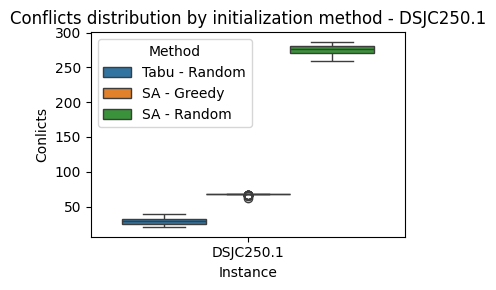

In [138]:
df_filtrado = df_filtrado[df_filtrado["Method"]!='Tabu - Greedy']

plt.figure(figsize=(4, 3))
sns.boxplot(data=df_filtrado[df_filtrado["instance_name"]=='DSJC250.1'], x='instance_name', y='conflitos', hue='Method')
plt.title(f'Conflicts distribution by initialization method - DSJC250.1')
plt.ylabel('Conlicts')
plt.xlabel('Instance')
plt.tight_layout()
plt.savefig("images/boxplot_dsjc250_1.eps", format="eps")  # Ou "svg", "eps"

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


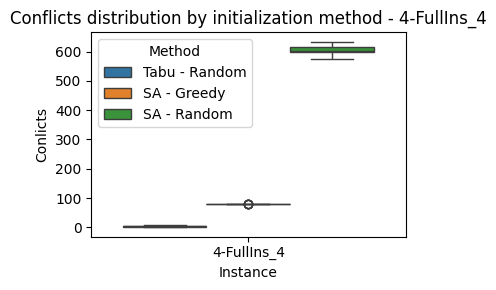

In [139]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_filtrado[df_filtrado["instance_name"]=='4-FullIns_4'], x='instance_name', y='conflitos', hue='Method')
plt.title(f'Conflicts distribution by initialization method - 4-FullIns_4')
plt.ylabel('Conlicts')
plt.xlabel('Instance')
plt.tight_layout()
plt.savefig("images/boxplot_4_FullIns_4.eps", format="eps")  # Ou "svg", "eps"

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


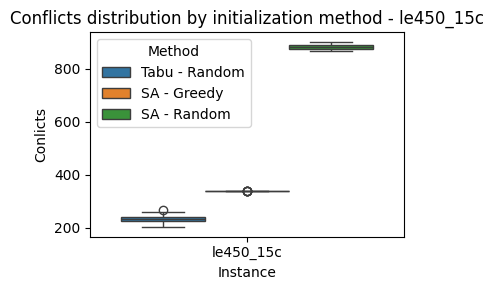

In [140]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_filtrado[df_filtrado["instance_name"]=='le450_15c'], x='instance_name', y='conflitos', hue='Method')
plt.title('Conflicts distribution by initialization method - le450_15c')
plt.ylabel('Conlicts')
plt.xlabel('Instance')
plt.tight_layout()
plt.savefig("images/boxplot_le450_15c.eps", format="eps")  # Ou "svg", "eps"

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


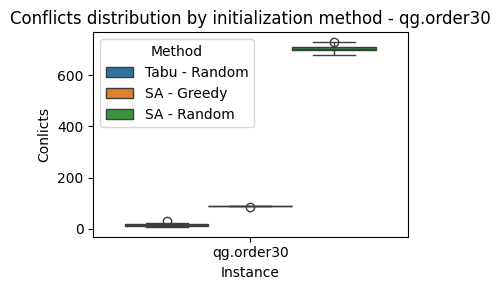

In [141]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_filtrado[df_filtrado["instance_name"]=='qg.order30'], x='instance_name', y='conflitos', hue='Method')
plt.title('Conflicts distribution by initialization method - qg.order30')
plt.ylabel('Conlicts')
plt.xlabel('Instance')
plt.tight_layout()
plt.savefig("images/boxplot_qg_order30.eps", format="eps")  # Ou "svg", "eps"

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


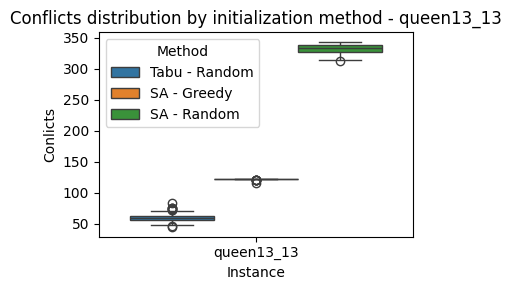

In [142]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_filtrado[df_filtrado["instance_name"]=='queen13_13'], x='instance_name', y='conflitos', hue='Method')
plt.title('Conflicts distribution by initialization method - queen13_13')
plt.ylabel('Conlicts')
plt.xlabel('Instance')
plt.tight_layout()
plt.savefig("images/boxplot_queen13_13.eps", format="eps")  # Ou "svg", "eps"

### Geral, para apresentação dos resultados completos

#### Melhores resultados encontrados

In [143]:
# Greedy
greedy_full = resultado_greedy[['filename', 'conflitos', 'tempo_s']].rename(
    columns={'conflitos': 'conflitos_Greedy', 'tempo_s': 'tempo_s_Greedy'})

# Tabu rand
tabu_random_full = resultado_tabu[resultado_tabu['init_method'] == 'random'][['filename', 'min_conflitos', 'min_tempo_s']].rename(
    columns={'min_conflitos': 'conflitos_Tabu_rand', 'min_tempo_s': 'tempo_s_Tabu_rand'})

# Tabu gree
tabu_greedy_full = resultado_tabu[resultado_tabu['init_method'] == 'greedy'][['filename', 'min_conflitos', 'min_tempo_s']].rename(
    columns={'min_conflitos': 'conflitos_Tabu_gree', 'min_tempo_s': 'tempo_s_Tabu_gree'})

# SA rand
sa_random_full = resultado_sa[resultado_sa['init_method'] == 'random'][['filename', 'min_conflitos', 'min_tempo_s']].rename(
    columns={'min_conflitos': 'conflitos_SA_rand', 'min_tempo_s': 'tempo_s_SA_rand'})

# SA gree
sa_greedy_full = resultado_sa[resultado_sa['init_method'] == 'greedy'][['filename', 'min_conflitos', 'min_tempo_s']].rename(
    columns={'min_conflitos': 'conflitos_SA_gree', 'min_tempo_s': 'tempo_SA_gree'})

# Junta tudo com merge por filename
comparative_full = greedy_full.merge(tabu_random_full, on='filename', how='left') \
                         .merge(tabu_greedy_full, on='filename', how='left') \
                         .merge(sa_random_full, on='filename', how='left') \
                         .merge(sa_greedy_full, on='filename', how='left')

comparative_full.head()

,filename,conflitos_Greedy,tempo_s_Greedy,conflitos_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,tempo_SA_gree
0,1-Insertions_4,1,0.026,1.0,0.080736,1,0.098965,16,608.108,0,0.044
1,1-Insertions_6,0,0.318,0.0,0.505424,0,0.000435,628,13243.622,0,0.484
2,2-Insertions_3,0,0.012,0.0,0.000070,0,0.000020,1,210.505,0,0.025
3,2-Insertions_4,1,0.049,1.0,0.172162,1,0.192954,63,1363.790,0,0.091
4,2-Insertions_5,0,0.254,0.0,0.280215,0,0.000322,415,8546.961,0,0.359


In [144]:
# Primeiro, se necessário, renomeia a coluna 'filename' para 'instance_name' no df_comp
df_comp_full = comparative_full.rename(columns={'filename': 'instance_name'})

# Agora faz o merge/join com base na coluna 'instance_name'
comparative_full = pd.merge(df_comp_full, df_desc[['instance_name', 'V', 'E', 'k', 'group']], on='instance_name', how='left')

comparative_full.head()

,instance_name,conflitos_Greedy,tempo_s_Greedy,conflitos_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,tempo_SA_gree,V,E,k,group
0,1-Insertions_4,1,0.026,1.0,0.080736,1,0.098965,16,608.108,0,0.044,67,232,4,CAR
1,1-Insertions_6,0,0.318,0.0,0.505424,0,0.000435,628,13243.622,0,0.484,607,6337,7,CAR
2,2-Insertions_3,0,0.012,0.0,0.000070,0,0.000020,1,210.505,0,0.025,37,72,4,CAR
3,2-Insertions_4,1,0.049,1.0,0.172162,1,0.192954,63,1363.790,0,0.091,149,541,4,CAR
4,2-Insertions_5,0,0.254,0.0,0.280215,0,0.000322,415,8546.961,0,0.359,597,3936,6,CAR


In [145]:
comparative_full['V_E'] = '(' + comparative_full['V'].astype(str) + '/' + comparative_full['E'].astype(str) + ')'

comparative_full.head()

,instance_name,conflitos_Greedy,tempo_s_Greedy,conflitos_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,tempo_SA_gree,V,E,k,group,V_E
0,1-Insertions_4,1,0.026,1.0,0.080736,1,0.098965,16,608.108,0,0.044,67,232,4,CAR,(67/232)
1,1-Insertions_6,0,0.318,0.0,0.505424,0,0.000435,628,13243.622,0,0.484,607,6337,7,CAR,(607/6337)
2,2-Insertions_3,0,0.012,0.0,0.000070,0,0.000020,1,210.505,0,0.025,37,72,4,CAR,(37/72)
3,2-Insertions_4,1,0.049,1.0,0.172162,1,0.192954,63,1363.790,0,0.091,149,541,4,CAR,(149/541)
4,2-Insertions_5,0,0.254,0.0,0.280215,0,0.000322,415,8546.961,0,0.359,597,3936,6,CAR,(597/3936)


In [146]:
comparative_full.loc[
    comparative_full["conflitos_SA_gree"] < comparative_full["conflitos_Greedy"],
    ["instance_name", "conflitos_Greedy", "tempo_s_Greedy", "conflitos_SA_gree", "tempo_SA_gree"]
].count()


instance_name        37
conflitos_Greedy     37
tempo_s_Greedy       37
conflitos_SA_gree    37
tempo_SA_gree        37
dtype: int64

In [147]:
comparative_full.loc[
    comparative_full["conflitos_Tabu_gree"] < comparative_full["conflitos_Tabu_rand"],
    ["instance_name", "conflitos_Greedy", "tempo_s_Greedy", 
             "conflitos_Tabu_rand", "tempo_s_Tabu_rand", 
             "conflitos_Tabu_gree", "tempo_s_Tabu_gree"]
].head()

,instance_name,conflitos_Greedy,tempo_s_Greedy,conflitos_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,tempo_s_Tabu_gree
22,fpsol2.i.1,0,0.668,13.0,27.868005,0,0.000769
23,fpsol2.i.2,0,0.435,24.0,13.898712,0,0.000556
24,fpsol2.i.3,0,0.451,23.0,13.801032,0,0.000565
26,homer,8,0.253,114.0,0.033859,8,0.000592
28,inithx.i.1,0,0.983,27.0,63.574894,0,0.001635


In [148]:
comparative_full.count()

instance_name          79
conflitos_Greedy       79
tempo_s_Greedy         79
conflitos_Tabu_rand    78
tempo_s_Tabu_rand      78
conflitos_Tabu_gree    79
tempo_s_Tabu_gree      79
conflitos_SA_rand      79
tempo_s_SA_rand        79
conflitos_SA_gree      79
tempo_SA_gree          79
V                      79
E                      79
k                      79
group                  79
V_E                    79
dtype: int64

In [149]:
destacadas = ['group', 'instance_name', 'V_E', 'k']
resto = [col for col in comparative_full.columns if col not in destacadas]
comparative_full = comparative_full[destacadas + resto]

In [150]:
comparative_full = comparative_full.sort_values(by=['group', 'instance_name']).reset_index(drop=True)

In [151]:
comparative_full.to_csv("Tables/comparativo_full_min.csv", index=False, sep=';')

#### Média dos resultados

In [152]:
# Tabu rand
tabu_random_full_avg = resultado_tabu[resultado_tabu['init_method'] == 'random'][['filename', 'avg_conflitos', 'avg_iter_found_best', 'std_conflitos', 'avg_tempo_s']].rename(
    columns={'avg_conflitos': 'conflitos_Tabu_rand', 'avg_iter_found_best': 'avg_iter_Tabu_rand', 'std_conflitos': 'std_Tabu_rand', 'avg_tempo_s': 'tempo_s_Tabu_rand'})

# Tabu gree
tabu_greedy_full_avg = resultado_tabu[resultado_tabu['init_method'] == 'greedy'][['filename', 'avg_conflitos', 'avg_iter_found_best', 'std_conflitos', 'avg_tempo_s']].rename(
    columns={'avg_conflitos': 'conflitos_Tabu_gree', 'avg_iter_found_best': 'avg_iter_Tabu_gree', 'std_conflitos': 'std_Tabu_gree', 'avg_tempo_s': 'tempo_s_Tabu_gree'})

# SA rand
sa_random_full_avg = resultado_sa[resultado_sa['init_method'] == 'random'][['filename', 'avg_conflitos', 'avg_iter_found_best', 'std_conflitos', 'avg_tempo_s']].rename(
    columns={'avg_conflitos': 'conflitos_SA_rand', 'avg_iter_found_best': 'avg_iter_SA_rand', 'std_conflitos': 'std_SA_rand', 'avg_tempo_s': 'tempo_s_SA_rand'})

# SA gree
sa_greedy_full_avg = resultado_sa[resultado_sa['init_method'] == 'greedy'][['filename', 'avg_conflitos', 'avg_iter_found_best', 'std_conflitos', 'avg_tempo_s']].rename(
    columns={'avg_conflitos': 'conflitos_SA_gree', 'avg_iter_found_best': 'avg_iter_SA_gree', 'std_conflitos': 'std_SA_gree', 'avg_tempo_s': 'tempo_SA_gree'})

# Junta tudo com merge por filename
comparativo_full_avg = tabu_random_full_avg.merge(tabu_greedy_full_avg, on='filename', how='left') \
                         .merge(sa_random_full_avg, on='filename', how='left') \
                         .merge(sa_greedy_full_avg, on='filename', how='left')

# Visualiza o resultado
comparativo_full_avg.head()

,filename,conflitos_Tabu_rand,avg_iter_Tabu_rand,std_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,avg_iter_Tabu_gree,std_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,avg_iter_SA_rand,std_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,avg_iter_SA_gree,std_SA_gree,tempo_SA_gree
0,1-Insertions_4,1.22,29.92,0.628932,0.095331,1.0,0.0,0.0,0.104429,20.166667,112173.466667,1.821014,646.590567,0.96,0.03,0.196946,142.82490
1,1-Insertions_6,1.10,309.22,1.176367,1.407888,0.0,0.0,0.0,0.000456,653.633333,146247.400000,12.658603,14277.511067,0.00,0.00,0.000000,0.91324
2,2-Insertions_3,0.00,10.97,0.000000,0.000132,0.0,0.0,0.0,0.000024,1.833333,48962.533333,0.647719,225.200667,0.00,0.00,0.000000,0.06380
3,2-Insertions_4,2.17,74.17,1.407448,0.234366,1.0,0.0,0.0,0.198373,67.166667,97797.933333,1.984132,1551.364367,0.97,0.11,0.171447,293.95300
4,2-Insertions_5,0.83,292.10,0.804721,0.918585,0.0,0.0,0.0,0.000340,451.466667,145927.233333,11.837210,9332.300533,0.00,0.00,0.000000,0.69057


In [153]:
# Primeiro, se necessário, renomeia a coluna 'filename' para 'instance_name' no df_comp
df_comp_full_avg = comparativo_full_avg.rename(columns={'filename': 'instance_name'})

# Agora faz o merge/join com base na coluna 'instance_name'
comparativo_full_avg = pd.merge(df_comp_full_avg, df_desc[['instance_name', 'V', 'E', 'k', 'group']], on='instance_name', how='left')
comparativo_full_avg['V_E'] = '(' + comparativo_full_avg['V'].astype(str) + '/' + comparativo_full_avg['E'].astype(str) + ')'

comparativo_full_avg.head()

,instance_name,conflitos_Tabu_rand,avg_iter_Tabu_rand,std_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,avg_iter_Tabu_gree,std_Tabu_gree,tempo_s_Tabu_gree,conflitos_SA_rand,...,tempo_s_SA_rand,conflitos_SA_gree,avg_iter_SA_gree,std_SA_gree,tempo_SA_gree,V,E,k,group,V_E
0,1-Insertions_4,1.22,29.92,0.628932,0.095331,1.0,0.0,0.0,0.104429,20.166667,...,646.590567,0.96,0.03,0.196946,142.82490,67,232,4,CAR,(67/232)
1,1-Insertions_6,1.10,309.22,1.176367,1.407888,0.0,0.0,0.0,0.000456,653.633333,...,14277.511067,0.00,0.00,0.000000,0.91324,607,6337,7,CAR,(607/6337)
2,2-Insertions_3,0.00,10.97,0.000000,0.000132,0.0,0.0,0.0,0.000024,1.833333,...,225.200667,0.00,0.00,0.000000,0.06380,37,72,4,CAR,(37/72)
3,2-Insertions_4,2.17,74.17,1.407448,0.234366,1.0,0.0,0.0,0.198373,67.166667,...,1551.364367,0.97,0.11,0.171447,293.95300,149,541,4,CAR,(149/541)
4,2-Insertions_5,0.83,292.10,0.804721,0.918585,0.0,0.0,0.0,0.000340,451.466667,...,9332.300533,0.00,0.00,0.000000,0.69057,597,3936,6,CAR,(597/3936)


In [154]:
destacadas = ['group', 'instance_name', 'V_E', 'k']
resto = [col for col in comparativo_full_avg.columns if col not in destacadas]
comparativo_full_avg = comparativo_full_avg[destacadas + resto]

comparativo_full_avg = comparativo_full_avg.sort_values(by=['group', 'instance_name']).reset_index(drop=True)

In [155]:
comparativo_full_avg.to_csv('Tables/comparativo_full_avg.csv', index=False, sep=';')

In [156]:
comparativo_full_avg.head()

,group,instance_name,V_E,k,conflitos_Tabu_rand,avg_iter_Tabu_rand,std_Tabu_rand,tempo_s_Tabu_rand,conflitos_Tabu_gree,avg_iter_Tabu_gree,...,conflitos_SA_rand,avg_iter_SA_rand,std_SA_rand,tempo_s_SA_rand,conflitos_SA_gree,avg_iter_SA_gree,std_SA_gree,tempo_SA_gree,V,E
0,CAR,1-Insertions_4,(67/232),4,1.22,29.92,0.628932,0.095331,1.0,0.0,...,20.166667,112173.466667,1.821014,646.590567,0.96,0.03,0.196946,142.82490,67,232
1,CAR,1-Insertions_6,(607/6337),7,1.10,309.22,1.176367,1.407888,0.0,0.0,...,653.633333,146247.400000,12.658603,14277.511067,0.00,0.00,0.000000,0.91324,607,6337
2,CAR,2-Insertions_3,(37/72),4,0.00,10.97,0.000000,0.000132,0.0,0.0,...,1.833333,48962.533333,0.647719,225.200667,0.00,0.00,0.000000,0.06380,37,72
3,CAR,2-Insertions_4,(149/541),4,2.17,74.17,1.407448,0.234366,1.0,0.0,...,67.166667,97797.933333,1.984132,1551.364367,0.97,0.11,0.171447,293.95300,149,541
4,CAR,2-Insertions_5,(597/3936),6,0.83,292.10,0.804721,0.918585,0.0,0.0,...,451.466667,145927.233333,11.837210,9332.300533,0.00,0.00,0.000000,0.69057,597,3936


In [157]:
def formatar_perc(media, desvio):
    if media == 0:
        return f"{media:.2f} ± 0%"
    rel = 100 * desvio / media
    return f"{media:.2f} ± {rel:.1f}%"

def formatar(media, desvio):
    # rel = 100 * desvio / media
    return f"{media:.2f} ± {desvio:.1f}"

##### Mean and StandardDeviation of 50 test runs for each instance

StandardDeviation in terms of absolute value

In [158]:
instancias = comparativo_full_avg['instance_name']
comparativo_full_avg_std = pd.DataFrame({
    "Instância": instancias,
    "Tabu (Random)": [formatar(m, s) for m, s in zip(comparativo_full_avg["conflitos_Tabu_rand"], comparativo_full_avg["std_Tabu_rand"])],
    "Tabu (Greedy)": [formatar(m, s) for m, s in zip(comparativo_full_avg["conflitos_Tabu_gree"], comparativo_full_avg["std_Tabu_gree"])],
    "SA (Random)": [formatar(m, s) for m, s in zip(comparativo_full_avg["conflitos_SA_rand"], comparativo_full_avg["std_SA_rand"])],
    "SA (Greedy)": [formatar(m, s) for m, s in zip(comparativo_full_avg["conflitos_SA_gree"], comparativo_full_avg["std_SA_gree"])],
})

comparativo_full_avg_std.to_csv('Tables/comparativo_full_avg_std.csv', index=False, sep=';')
comparativo_full_avg_std.head(48)

,Instância,Tabu (Random),Tabu (Greedy),SA (Random),SA (Greedy)
0,1-Insertions_4,1.22 ± 0.6,1.00 ± 0.0,20.17 ± 1.8,0.96 ± 0.2
1,1-Insertions_6,1.10 ± 1.2,0.00 ± 0.0,653.63 ± 12.7,0.00 ± 0.0
2,2-Insertions_3,0.00 ± 0.0,0.00 ± 0.0,1.83 ± 0.6,0.00 ± 0.0
3,2-Insertions_4,2.17 ± 1.4,1.00 ± 0.0,67.17 ± 2.0,0.97 ± 0.2
4,2-Insertions_5,0.83 ± 0.8,0.00 ± 0.0,451.47 ± 11.8,0.00 ± 0.0
5,3-FullIns_4,2.62 ± 1.1,11.00 ± 0.0,346.47 ± 8.5,57.94 ± 0.3
6,3-Insertions_3,0.00 ± 0.0,0.00 ± 0.0,5.83 ± 0.8,0.00 ± 0.0
7,4-FullIns_4,3.27 ± 1.3,11.00 ± 0.0,605.07 ± 12.5,79.93 ± 0.3
8,4-Insertions_3,2.59 ± 2.0,1.00 ± 0.0,17.03 ± 1.4,0.98 ± 0.1
9,4-Insertions_4,0.20 ± 0.4,0.00 ± 0.0,229.77 ± 6.6,0.00 ± 0.0


Standard Deviation in terms of percentual of mean values

In [159]:
instancias = comparativo_full_avg['instance_name']
comparativo_full_avg_std_perc = pd.DataFrame({
    "Instância": instancias,
    "Tabu (Random)": [formatar_perc(m, s) for m, s in zip(comparativo_full_avg["conflitos_Tabu_rand"], comparativo_full_avg["std_Tabu_rand"])],
    "Tabu (Greedy)": [formatar_perc(m, s) for m, s in zip(comparativo_full_avg["conflitos_Tabu_gree"], comparativo_full_avg["std_Tabu_gree"])],
    "SA (Random)": [formatar_perc(m, s) for m, s in zip(comparativo_full_avg["conflitos_SA_rand"], comparativo_full_avg["std_SA_rand"])],
    "SA (Greedy)": [formatar_perc(m, s) for m, s in zip(comparativo_full_avg["conflitos_SA_gree"], comparativo_full_avg["std_SA_gree"])],
})

comparativo_full_avg_std_perc.to_csv('Tables/comparativo_full_avg_std_perc.csv', index=False, sep=';')
comparativo_full_avg_std_perc.head(48)

,Instância,Tabu (Random),Tabu (Greedy),SA (Random),SA (Greedy)
0,1-Insertions_4,1.22 ± 51.6%,1.00 ± 0.0%,20.17 ± 9.0%,0.96 ± 20.5%
1,1-Insertions_6,1.10 ± 106.9%,0.00 ± 0%,653.63 ± 1.9%,0.00 ± 0%
2,2-Insertions_3,0.00 ± 0%,0.00 ± 0%,1.83 ± 35.3%,0.00 ± 0%
3,2-Insertions_4,2.17 ± 64.9%,1.00 ± 0.0%,67.17 ± 3.0%,0.97 ± 17.7%
4,2-Insertions_5,0.83 ± 97.0%,0.00 ± 0%,451.47 ± 2.6%,0.00 ± 0%
5,3-FullIns_4,2.62 ± 43.7%,11.00 ± 0.0%,346.47 ± 2.5%,57.94 ± 0.5%
6,3-Insertions_3,0.00 ± 0%,0.00 ± 0%,5.83 ± 14.3%,0.00 ± 0%
7,4-FullIns_4,3.27 ± 39.8%,11.00 ± 0.0%,605.07 ± 2.1%,79.93 ± 0.4%
8,4-Insertions_3,2.59 ± 76.5%,1.00 ± 0.0%,17.03 ± 8.2%,0.98 ± 14.4%
9,4-Insertions_4,0.20 ± 224.7%,0.00 ± 0%,229.77 ± 2.9%,0.00 ± 0%


In [160]:
latex_code = comparativo_full_avg_std.to_latex(index=False, column_format="lcccc", escape=True)

print(latex_code)

\begin{tabular}{lcccc}
\toprule
Instância & Tabu (Random) & Tabu (Greedy) & SA (Random) & SA (Greedy) \\
\midrule
1-Insertions\_4 & 1.22 ± 0.6 & 1.00 ± 0.0 & 20.17 ± 1.8 & 0.96 ± 0.2 \\
1-Insertions\_6 & 1.10 ± 1.2 & 0.00 ± 0.0 & 653.63 ± 12.7 & 0.00 ± 0.0 \\
2-Insertions\_3 & 0.00 ± 0.0 & 0.00 ± 0.0 & 1.83 ± 0.6 & 0.00 ± 0.0 \\
2-Insertions\_4 & 2.17 ± 1.4 & 1.00 ± 0.0 & 67.17 ± 2.0 & 0.97 ± 0.2 \\
2-Insertions\_5 & 0.83 ± 0.8 & 0.00 ± 0.0 & 451.47 ± 11.8 & 0.00 ± 0.0 \\
3-FullIns\_4 & 2.62 ± 1.1 & 11.00 ± 0.0 & 346.47 ± 8.5 & 57.94 ± 0.3 \\
3-Insertions\_3 & 0.00 ± 0.0 & 0.00 ± 0.0 & 5.83 ± 0.8 & 0.00 ± 0.0 \\
4-FullIns\_4 & 3.27 ± 1.3 & 11.00 ± 0.0 & 605.07 ± 12.5 & 79.93 ± 0.3 \\
4-Insertions\_3 & 2.59 ± 2.0 & 1.00 ± 0.0 & 17.03 ± 1.4 & 0.98 ± 0.1 \\
4-Insertions\_4 & 0.20 ± 0.4 & 0.00 ± 0.0 & 229.77 ± 6.6 & 0.00 ± 0.0 \\
DSJC1000.1 & 152.47 ± 10.0 & 157.00 ± 0.0 & 2059.33 ± 15.6 & 331.94 ± 0.3 \\
DSJC250.1 & 28.54 ± 4.4 & 30.00 ± 0.0 & 275.70 ± 6.9 & 67.80 ± 0.7 \\
DSJC250.5 & 43.